#Ejemplo de Análisis Exploratorio de Dataset Iris
En este cuaderno repasaremos cómo se realiza un análisis exploratorio utilizando uno de los datasets más conocidos en el ámbito de la Ciencia de Datos: Iris
Este data set contiene cuatro características (longitud y anchura de sépalos y pétalos) de 50 muestras de tres especies de flores Iris (Iris setosa, Iris virginica e Iris versicolor).


## Bibliotecas a utilizar en el cuaderno

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Creación de un dataframe a partir del archivo csv

In [22]:
dfIris = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSLgU6YF5djPgcJvcmXyqdIjfVefPsYlj6HUnRH15sZwsEL4GX7KPY-c3CWgM3n8vCljid-ZPocdAAl/pub?output=csv')

Visualización del segmento inicial y final de los datos

In [23]:
dfIris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Preprocesamiento
Renombraremos las columnas al español, y eliminaremos la columan Id ya que no será utilizada para el análisis

In [24]:
#Renombrado de columnas
dfIris.rename({'SepalLengthCm':'sepalo_largo',
           'SepalWidthCm':'sepalo_ancho',
           'PetalLengthCm':'petalo_largo',
           'PetalWidthCm':'petalo_ancho',
           'Species':'especies'},
          axis=1, inplace=True) # inplace = True para que el renombrado sea sobre el mismo df

dfIris.drop('Id', axis=1, inplace=True) #axis=1 indica que es una columna


In [25]:
dfIris

,sepalo_largo,sepalo_ancho,petalo_largo,petalo_ancho,especies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Inspección de la forma del df

In [26]:
dfIris.shape

(150, 5)

Analizaremos la cantidad de instancias de cada especie

In [27]:
dfIris['especies'].value_counts()

especies
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Veamos la información general del dataset

In [28]:
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepalo_largo  150 non-null    float64
 1   sepalo_ancho  150 non-null    float64
 2   petalo_largo  150 non-null    float64
 3   petalo_ancho  150 non-null    float64
 4   especies      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Obtenemos los principales indicadores estadísticos de las variables del dataset

In [29]:
dfIris.describe()

,sepalo_largo,sepalo_ancho,petalo_largo,petalo_ancho
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Análisis Univariado

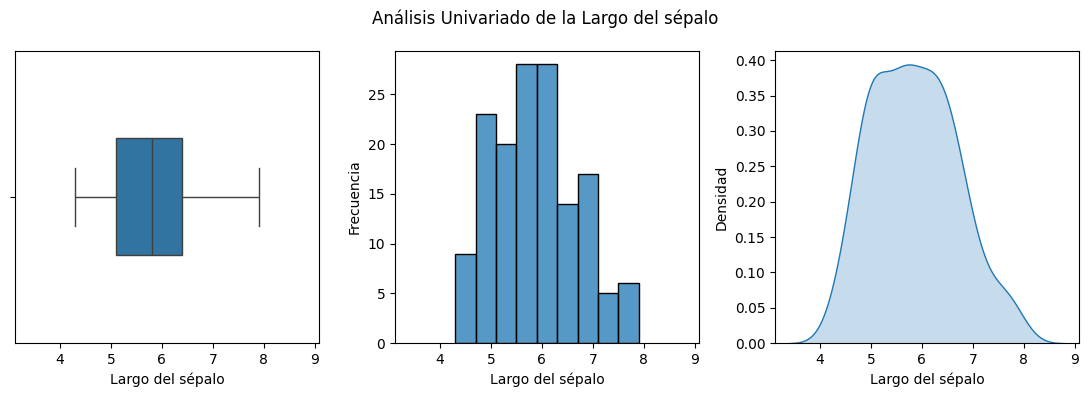

In [30]:
var = 'sepalo_largo'
var_title = 'Largo del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=dfIris[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=dfIris[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=dfIris[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

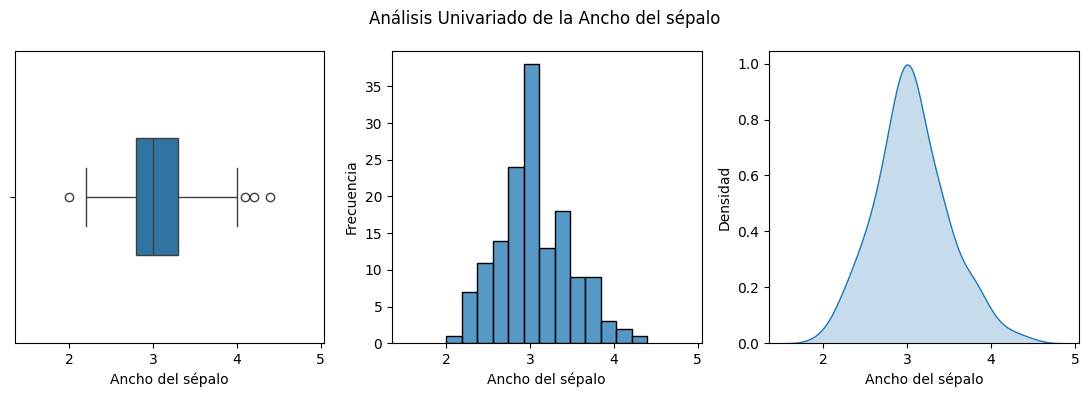

In [31]:
var = 'sepalo_ancho'
var_title = 'Ancho del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=dfIris[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=dfIris[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=dfIris[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

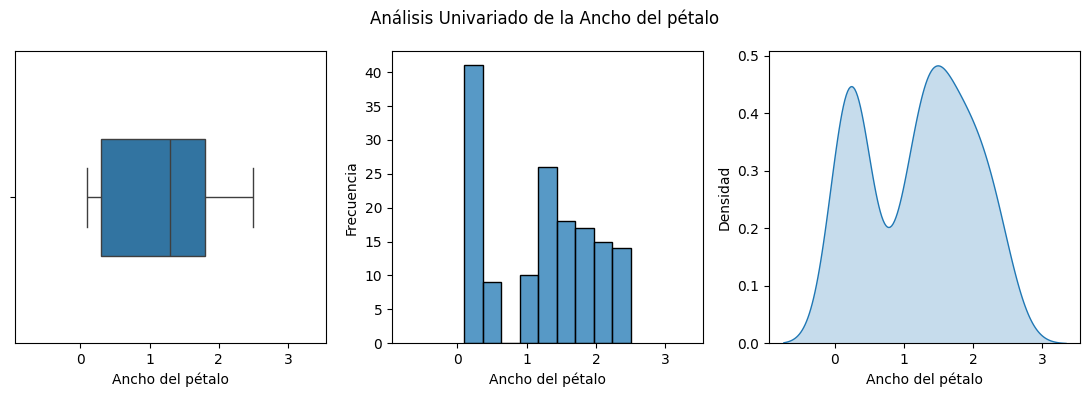

In [32]:
var = 'petalo_ancho'
var_title = 'Ancho del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=dfIris[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=dfIris[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=dfIris[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

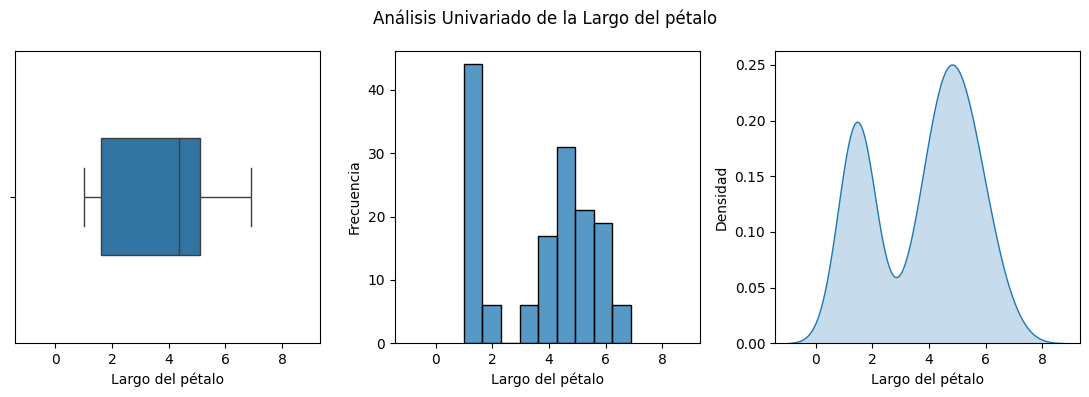

In [33]:
var = 'petalo_largo'
var_title = 'Largo del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=dfIris[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=dfIris[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=dfIris[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Análisis bi-variado Largo del Sépalo y Especie

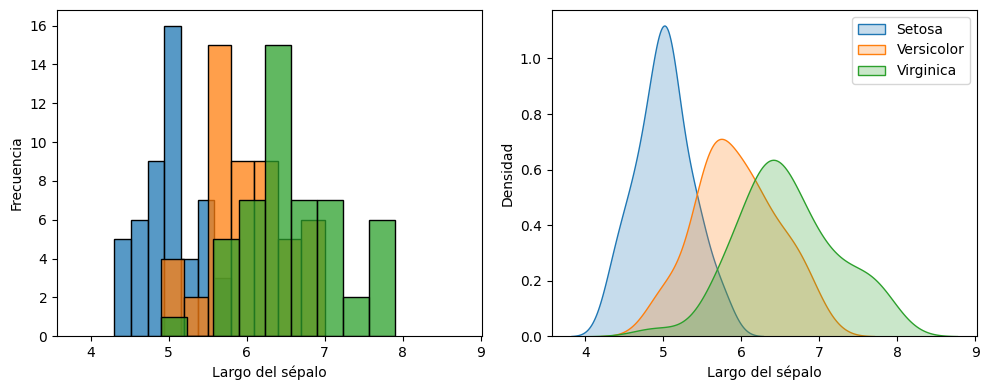

In [34]:
var = 'sepalo_largo'
var_title = 'Largo del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-setosa')], x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-versicolor')], x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-virginica')], x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-setosa')], x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-versicolor')], x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-virginica')], x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

Analizando los gráficos del largo del sépalo por especie podemos observar que la longitud de la especie Setosa es menor en cambio la diferencia no es tan notoria entre Versicolor y Virginica

#Análisis bi-variado Ancho del Sépalo y Especie

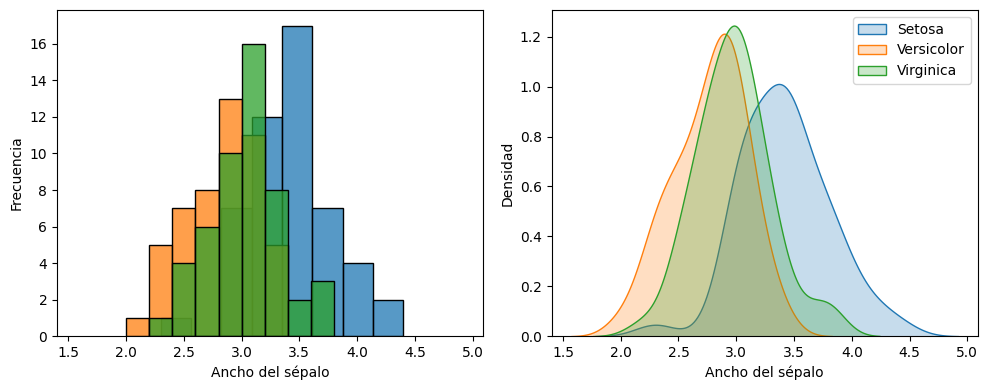

In [35]:
var = 'sepalo_ancho'
var_title = 'Ancho del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-setosa')], x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-versicolor')], x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-virginica')], x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-setosa')], x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-versicolor')], x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-virginica')], x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

A diferencia del largo, en el ancho del sépalo existe una mayor superposición de los valores para las 3 especies por lo tanto podríamos decir que no sería un buen atributo para diferenciar las especies

#Análisis bi-variado Largo del Pétalo y Especie

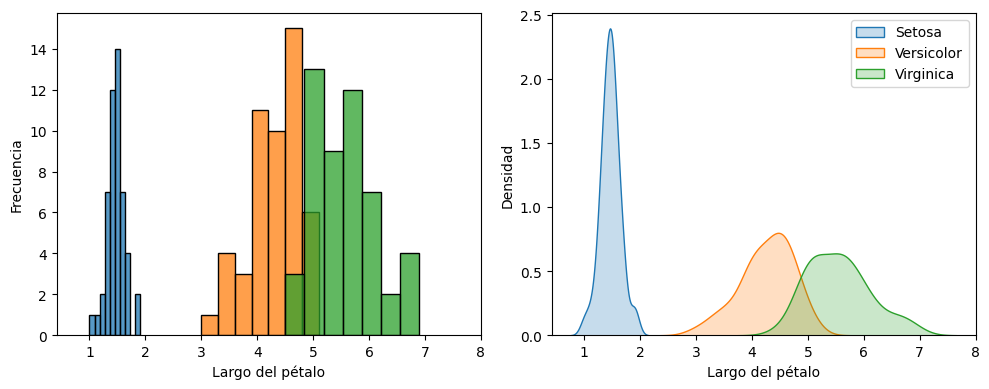

In [36]:
var = 'petalo_largo'
var_title = 'Largo del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-setosa')], x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-versicolor')], x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-virginica')], x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-setosa')], x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-versicolor')], x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-virginica')], x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

La longitud de los pétalos de las flores de setosa es claramente inferior a la de las otras dos especies.
La longitud de las flores versicolor es principalmente menor que las de virginica, aunque existe una superposición.
El largo del pétalos podría ser un mejor clasificador.

#Análisis bi-variado Ancho del Pétalo y Especie

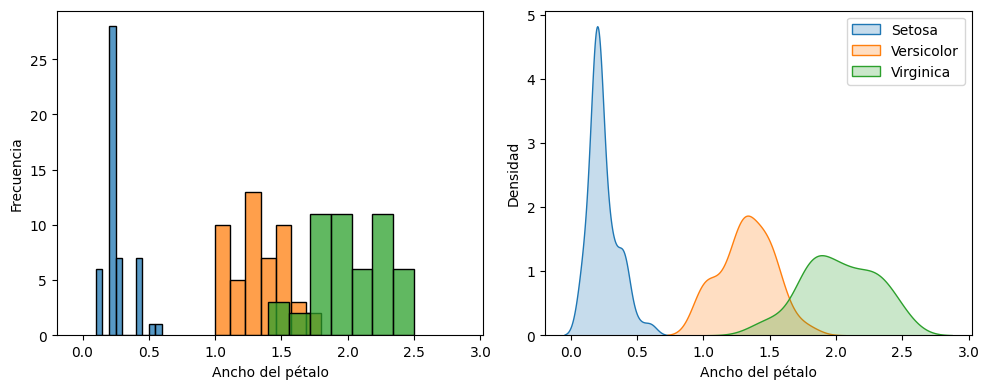

In [37]:
var = 'petalo_ancho'
var_title = 'Ancho del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-setosa')], x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-versicolor')], x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-virginica')], x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-setosa')], x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-versicolor')], x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=dfIris.loc[(dfIris['especies'] == 'Iris-virginica')], x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

La longitud de los pétalos de las flores de setosa es claramente inferior a las demás especies.
Aunque la diferencia es menor entre versicolor e virginica, la longitud de las flores versicolor en su mayoria es inferior a las de virginica.
Esta variable también podría resultar un buen clasificador

#Análisis multi-variado

#Análisis de largo y ancho del sépalo por especie

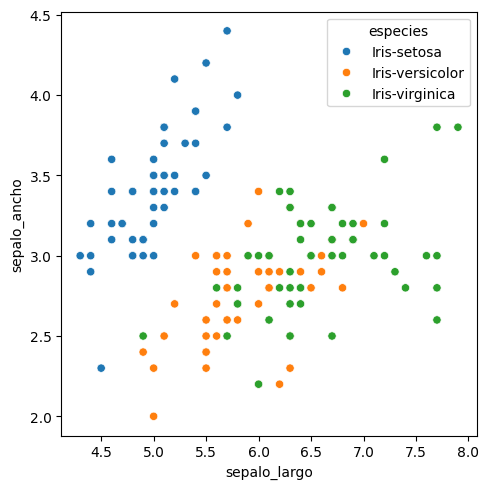

In [38]:
# Ajustes de la figura de Matplotlib
varx= "sepalo_largo"
vary= "sepalo_ancho"
varhue="especies"
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=dfIris, x=varx, y=vary, ax=ax, hue=varhue)
plt.tight_layout()

Con este gráfico vemos que con el largo y ancho del sépalo pueden clasificarse con claridad las Iris Setosa pero no pueden distinguirse las clases Versicolor y Virginica

#Análisis de largo y ancho del pétalo por especie

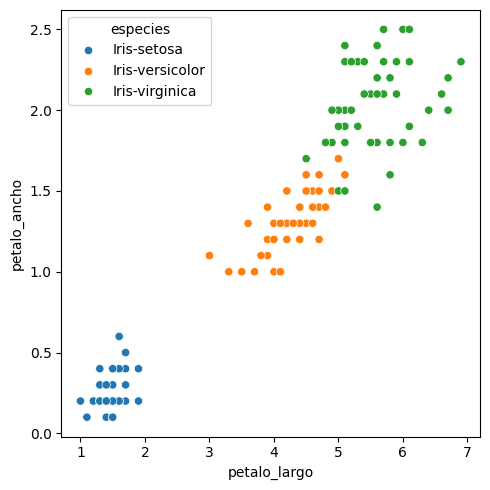

In [39]:
# Ajustes de la figura de Matplotlib
varx= "petalo_largo"
vary= "petalo_ancho"
varhue="especies"
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=dfIris, x=varx, y=vary, ax=ax, hue=varhue)
plt.tight_layout()

Como se ve en la gráfica con el ancho y largo del pétalo pueden clasificarse casi de manera disjunta las 3 especies.

#Todas las variables

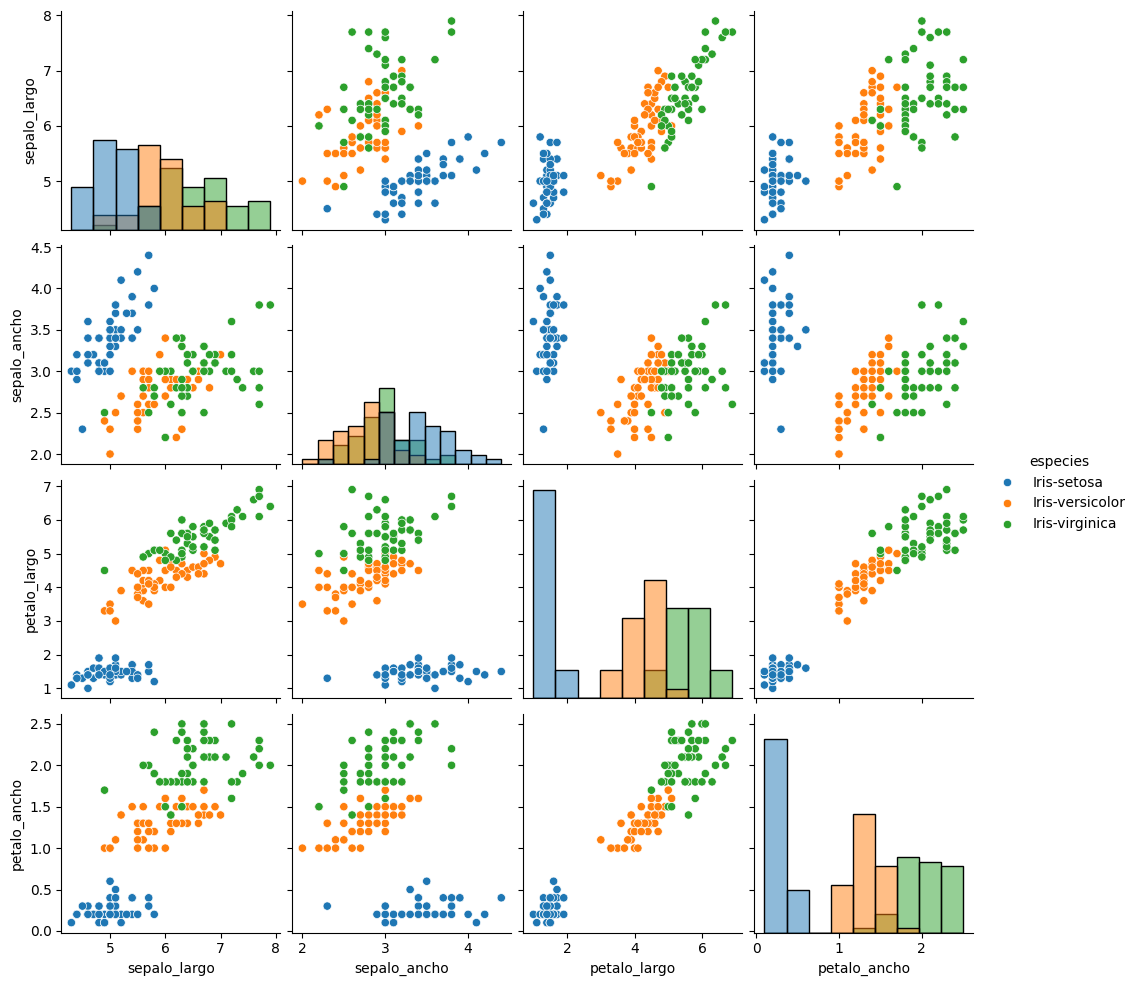

In [40]:
sns.pairplot(dfIris, hue="especies", diag_kind="hist")